# Analysis of Antibiotics Prescription and Hospitalisation Risk

In [57]:
import pandas as pd
from matplotlib import pyplot
import matplotlib.pyplot as plt
import seaborn as sns
import math
import numpy as np
import os
import glob
import gzip
from matplotlib.ticker import PercentFormatter
import sklearn
from sklearn.model_selection import train_test_split
%matplotlib inline

In [58]:
#os.chdir("..")
current_working_dir = os.getcwd()
print(current_working_dir)

c:\Users\m84300af\OneDrive - The University of Manchester\Documents\GitHub\amr-uom-brit


In [59]:
import warnings
warnings.filterwarnings('ignore')
warnings.warn('DelftStack')
warnings.warn('Do not show this message')
print("No Warning Shown")

No Warning Shown


In [329]:
def makeFilePath(pathFromWorkspace, fileName):
    workingdir = "/workspace/" if (os.name != "nt") else ""
    filepath = workingdir+pathFromWorkspace+fileName

    return filepath

# def makeFilePath(pathFromWorkspace, fileName):
#     workingdir = "" if (os.name != "nt") else ""
#     filepath = workingdir+pathFromWorkspace+fileName

#     return filepath

In [330]:
data2019_month = {}
data2020_month = {}
data2021_month = {}
data2019 = []
data2020 = []
data2021 = []
for  i in range(1, 13):
    # data of 2019
    input_file_path = makeFilePath("output/hospitalisation_data/", "input_hospitalisation_2019-"+str(i).zfill(2)+"-01.csv.gz")
    data2019_month["%s" %i] = pd.read_csv(input_file_path, compression='gzip')
    data2019_month["%s" %i]['date'] = "2019-"+str(i).zfill(2)+"-01"
    data2019.append(data2019_month["%s" %i])
    # data of 2020
    input_file_path = makeFilePath("output/hospitalisation_data/", "input_hospitalisation_2020-"+str(i).zfill(2)+"-01.csv.gz")
    data2020_month["%s" %i] = pd.read_csv(input_file_path, compression='gzip')
    data2020_month["%s" %i]['date'] = "2020-"+str(i).zfill(2)+"-01"
    data2020.append(data2020_month["%s" %i])
    # data of 2021
    input_file_path = makeFilePath("output/hospitalisation_data/", "input_hospitalisation_2021-"+str(i).zfill(2)+"-01.csv.gz")
    data2021_month["%s" %i] = pd.read_csv(input_file_path, compression='gzip')
    data2021_month["%s" %i]['date'] = "2021-"+str(i).zfill(2)+"-01"
    data2021.append(data2021_month["%s" %i])
    
data2019 = pd.concat(data2019_month, axis=0, ignore_index=True)
data2020 = pd.concat(data2020_month, axis=0, ignore_index=True)
data2021 = pd.concat(data2021_month, axis=0, ignore_index=True)

data = data2019.append([data2020, data2021], ignore_index=True)

In [331]:
data.columns

Index(['bmi_date_measured', 'smoking_status_date',
       'most_recent_unclear_smoking_cat_date', 'flu_vaccine_med',
       'flu_vaccine_clinical', 'antibacterial_prescriptions_date',
       'sgss_positive', 'primary_care_covid', 'covrx1_dat', 'covrx2_dat',
       'admitted_date', 'died_date', 'uti_date_1', 'uti_date_2', 'uti_date_3',
       'uti_date_4', 'lrti_date_1', 'lrti_date_2', 'lrti_date_3',
       'lrti_date_4', 'age', 'age_cat', 'sex', 'practice', 'region', 'msoa',
       'imd', 'bmi', 'ethnicity', 'smoking_status', 'gp_count',
       'flu_vaccine_tpp', 'flu_vaccine', 'antibacterial_prescriptions',
       'antibacterial_brit', 'broad_spectrum_antibiotics_prescriptions',
       'admitted', 'uti_counts', 'lrti_counts', 'urti_counts',
       'sinusitis_counts', 'ot_externa_counts', 'otmedia_counts', 'uti_pt',
       'lrti_pt', 'urti_pt', 'sinusitis_pt', 'ot_externa_pt', 'otmedia_pt',
       'uti_ab_count_1', 'uti_ab_count_2', 'uti_ab_count_3', 'uti_ab_count_4',
       'lrti_ab_c

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36000 entries, 0 to 35999
Data columns (total 76 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   bmi_date_measured                         34200 non-null  object 
 1   smoking_status_date                       3600 non-null   object 
 2   most_recent_unclear_smoking_cat_date      3600 non-null   object 
 3   flu_vaccine_med                           3600 non-null   object 
 4   flu_vaccine_clinical                      3600 non-null   object 
 5   antibacterial_prescriptions_date          94 non-null     object 
 6   sgss_positive                             3600 non-null   object 
 7   covrx1_dat                                0 non-null      float64
 8   covrx2_dat                                0 non-null      float64
 9   admitted_date                             10800 non-null  object 
 10  died_date                         

In [39]:
data.describe(include='all')

,bmi_date_measured,smoking_status_date,most_recent_unclear_smoking_cat_date,flu_vaccine_med,flu_vaccine_clinical,antibacterial_prescriptions_date,sgss_positive,covrx1_dat,covrx2_dat,admitted_date,...,hiv_comor,metastatic_cancer_comor,mild_liver_comor,mod_severe_liver_comor,mod_severe_renal_comor,mi_comor,peptic_ulcer_comor,peripheral_vascular_comor,patient_id,date
count,34200,3600,3600,3600,3600,94,3600,0.0,0.0,10800,...,36000.000000,36000.000000,36000.000000,36000.000000,36000.000000,36000.000000,36000.000000,36000.000000,36000.000000,36000
unique,36,36,36,13,7,29,1023,NaN,NaN,1070,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36
top,2020-08,2021-05,2019-10,2018-06,2018-10,2019-01-18,2019-06-19,NaN,NaN,2019-02-10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-01-01
freq,1029,125,119,316,624,8,10,NaN,NaN,23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1000
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,5007.811250,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.300004,0.300004,0.300004,0.300004,0.300004,0.300004,0.300004,0.300004,2886.803429,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2527.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4995.500000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7515.000000,NaN


## Data Preparation

In [19]:
data.columns

Index(['bmi_date_measured', 'smoking_status_date',
       'most_recent_unclear_smoking_cat_date', 'flu_vaccine_med',
       'flu_vaccine_clinical', 'sgss_positive', 'covrx1_dat', 'covrx2_dat',
       'died_date', 'uti_date_1', 'uti_ab_date_1', 'uti_date_2',
       'uti_ab_date_2', 'uti_date_3', 'uti_ab_date_3', 'uti_date_4',
       'uti_ab_date_4', 'lrti_date_1', 'lrti_ab_date_1', 'lrti_date_2',
       'lrti_ab_date_2', 'lrti_date_3', 'lrti_ab_date_3', 'lrti_date_4',
       'lrti_ab_date_4', 'age', 'age_cat', 'sex', 'practice', 'region', 'msoa',
       'imd', 'bmi', 'ethnicity', 'smoking_status', 'gp_count',
       'flu_vaccine_tpp', 'flu_vaccine', 'antibacterial_prescriptions',
       'antibacterial_brit', 'broad_spectrum_antibiotics_prescriptions',
       'primary_care_covid', 'admitted', 'uti_counts', 'lrti_counts',
       'urti_counts', 'sinusitis_counts', 'ot_externa_counts',
       'otmedia_counts', 'uti_pt', 'lrti_pt', 'urti_pt', 'sinusitis_pt',
       'ot_externa_pt', 'otmedia_

In [62]:
# define dictionaries

dict_sex = {'F': 'Female', 'M': 'Male'}
dict_ethnicity = {1: 'White', 2: 'Mixed', 3: 'Asian', 4: 'Black', 5: 'Other', 0: 'Unknown', np.nan: 'Unknown'}
dict_smoking = {'E': 'Ex-smoker', 'M': 'Unknown', 'S': 'Smoker', 'N': 'Never smoked'}
dict_imd = {0: 'Unknown', 1: '1 (most deprived)', 2: '2', 3: '3', 4: '4', 5: '5 (least deprived)', np.nan: 'Unknown'}
dict_flu = {0: 'No', 1: 'Yes'}

In [63]:
# reoplace values of dictionaries with existing ones

data = data.replace({"sex": dict_sex})
data = data.replace({"ethnicity": dict_ethnicity})
data = data.replace({"smoking_status": dict_smoking})
data = data.replace({"imd": dict_imd})
data = data.replace({"flu_vaccine": dict_flu})

In [64]:
#prep before plot

data['age'][data['age'] < 0] = np.nan

## remove died cases
#data.died_date.value_counts()

# remove cases with bmi equal 0
data['bmi'][data['bmi'] == 0] = np.nan

# remove cases with negative gp_count
data['gp_count'][data['gp_count'] < 0] = np.nan

# Negative GP consultations mean what? Shall I remove them?

## Plots continuous factors

In [43]:
# function to generate histogram plots
def create_histplot(title, df, ax):
    ax.hist(df, color = 'purple', edgecolor = 'black', bins=20)
    ax.set_title(title)
    ax.set_ylabel('Frequency')
    ax.xaxis.set_tick_params(which='both', labelbottom=True, labeltop=False, rotation=0)

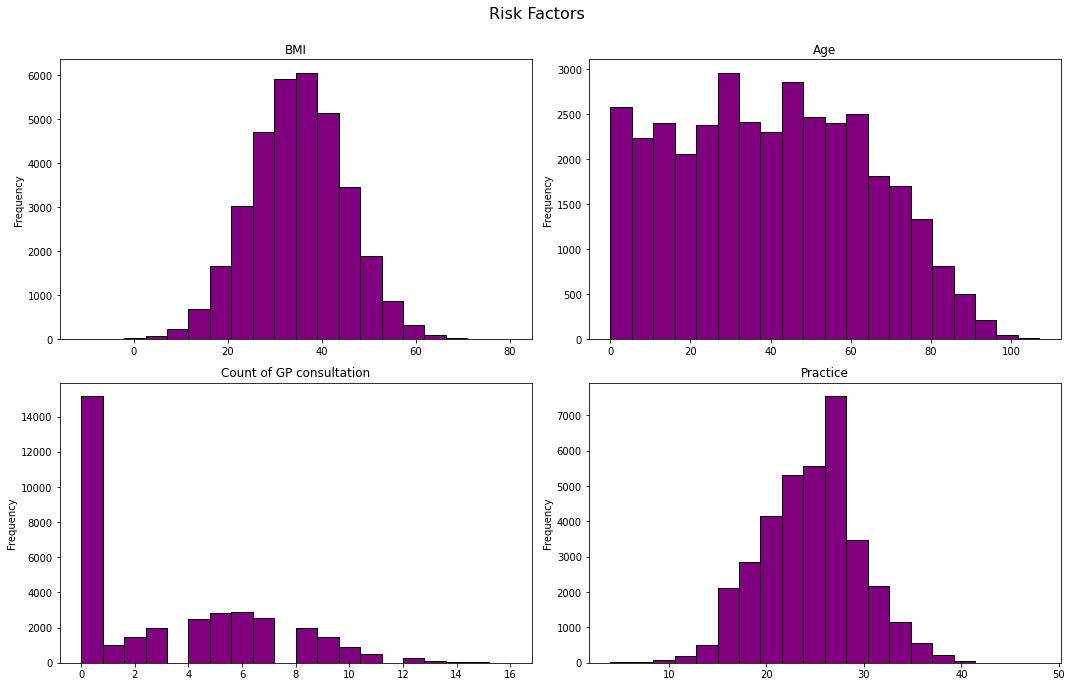

In [44]:
fig, axes = plt.subplots(2,2, 
                        figsize=(15, 10)
                        )
create_histplot('BMI', data['bmi'], axes[0,0])
create_histplot('Age', data['age'], axes[0,1])
create_histplot('Count of GP consultation', data['gp_count'], axes[1,0])
create_histplot('Practice', data['practice'], axes[1,1])
#fig.delaxes(ax=axes[1,1])

fig.suptitle('Risk Factors', fontsize=16)
fig.tight_layout(rect=[0, 0.03, 1, 0.98])
#plt.tight_layout()
#plt.savefig('../output/hospitalisation_risk/risk_factors_cont.jpg')
plt.show()

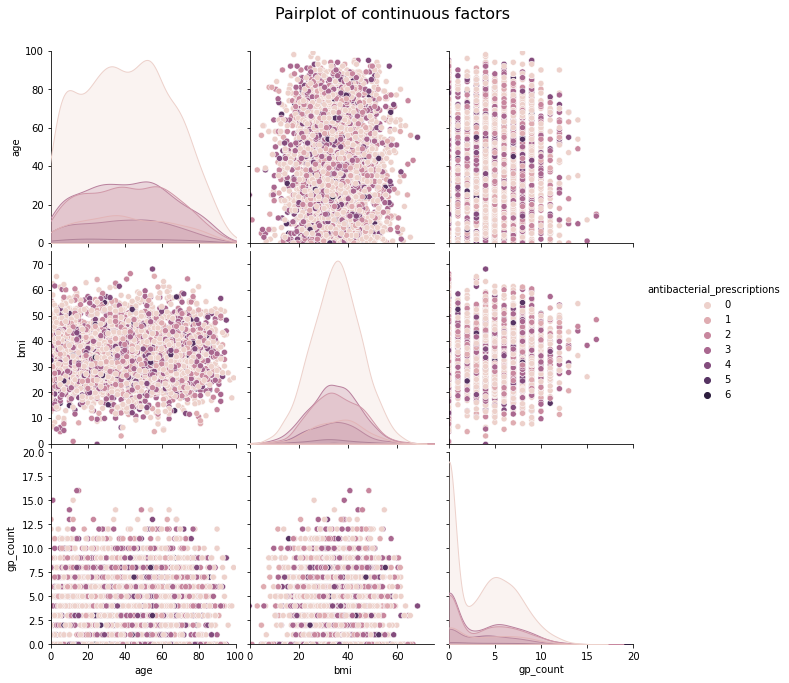

In [221]:
p = sns.pairplot(data, vars=['age', 'bmi', 'gp_count'#, 'practice'
                             ], 
                hue = 'antibacterial_prescriptions', 
#                kind='reg', 
                #markers=["o", "s"], 
                diag_kind="kde",#"hist"
#                plot_kws={#'line_kws':{'color':'red'}, 
#                'scatter_kws': {'alpha': 0.2}}, 
                height = 3)

p.axes[0,2].set_xlim((0,20))
p.axes[0,2].set_ylim((0,100))

p.axes[1,1].set_xlim((0,75))
p.axes[1,1].set_ylim((0,75))

p.axes[2,0].set_xlim((0,100))
p.axes[2,0].set_ylim((0,20))

plt.suptitle('Pairplot of continuous factors', fontsize=16, y=1.05)
plt.savefig('../output/hospitalisation_risk/risk_factors_cont_pairplot.jpg')
plt.show()

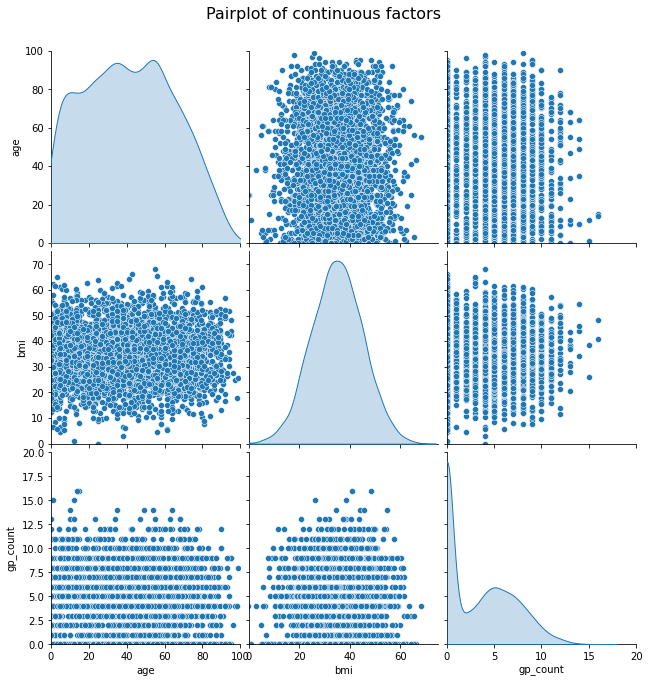

In [222]:
p = sns.pairplot(data, vars=['age', 'bmi', 'gp_count'#, 'practice'
                             ], 
                #hue = 'admitted', 
#                kind='reg', 
                #markers=["o", "s"], 
#                diag_kind="kde",#"hist"
#                plot_kws={#'line_kws':{'color':'red'}, 
#                'scatter_kws': {'alpha': 0.2}}, 
                height = 3)

p.axes[0,2].set_xlim((0,20))
p.axes[0,2].set_ylim((0,100))

p.axes[1,1].set_xlim((0,75))
p.axes[1,1].set_ylim((0,75))

p.axes[2,0].set_xlim((0,100))
p.axes[2,0].set_ylim((0,20))

plt.suptitle('Pairplot of continuous factors', fontsize=16, y=1.05)
plt.savefig('../output/hospitalisation_risk/risk_factors_cont_pairplot2.jpg')
plt.show()

## Plot categorical factors

In [147]:
def create_lineplot(var, title, legend_title, ax1):
    a = data.groupby(['date', var]).size().reset_index()
    a.columns = ['date', var, 'Freq']
    sns.lineplot(x='date', y='Freq', 
            hue=var, 
            data=a,
            ax=ax1)
    ax1.set_title(title)
    ax1.set_ylabel('Frequency')
    ax1.xaxis.set_tick_params(which='both', labelbottom=True, labeltop=False, rotation=90)
    ax1.legend(title=legend_title)

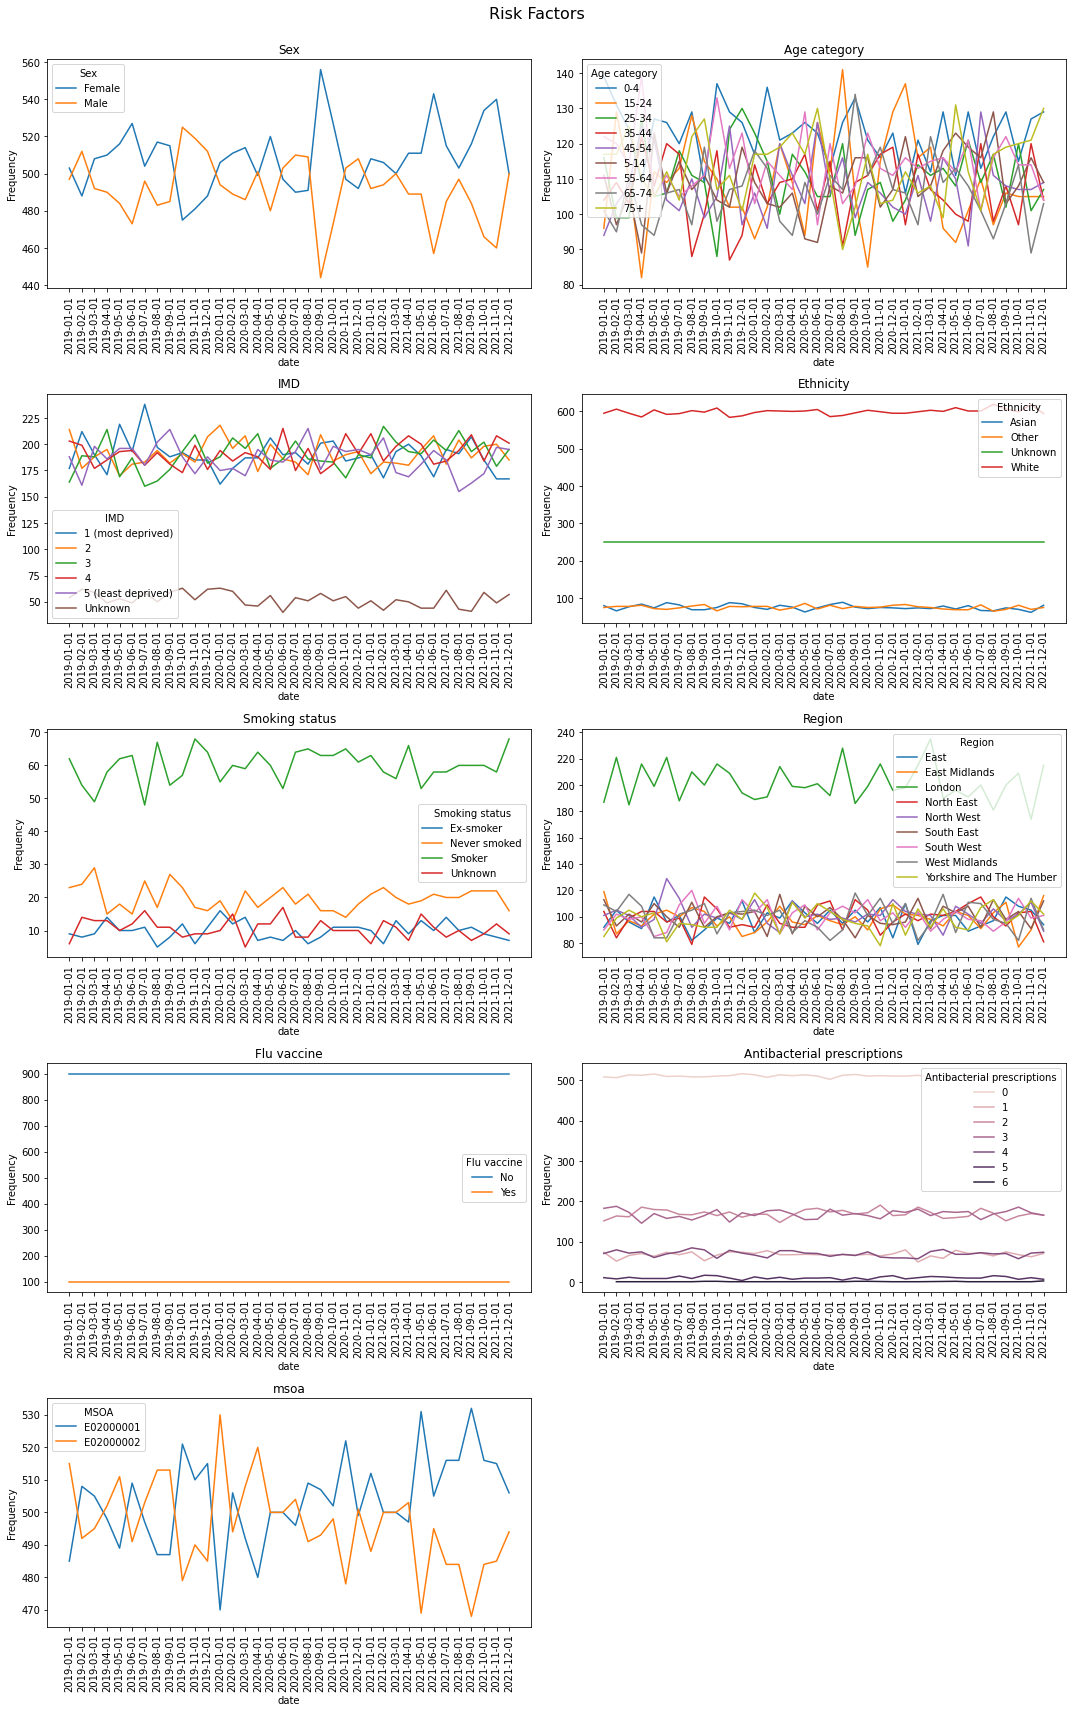

In [150]:
fig, axes = plt.subplots(5,2,
                        figsize=(15, 25)
                        )
create_lineplot('sex', 'Sex', 'Sex', axes[0,0])
create_lineplot('age_cat', 'Age category', 'Age category', axes[0,1])
create_lineplot('imd', 'IMD', 'IMD', axes[1,0])
create_lineplot('ethnicity', 'Ethnicity', 'Ethnicity', axes[1,1])
create_lineplot('smoking_status', 'Smoking status', 'Smoking status', axes[2,0])
create_lineplot('region', 'Region', 'Region', axes[2,1])
create_lineplot('flu_vaccine', 'Flu vaccine', 'Flu vaccine', axes[3,0])
create_lineplot('antibacterial_prescriptions', 'Antibacterial prescriptions', 'Antibacterial prescriptions', axes[3,1])
create_lineplot('msoa', 'msoa', 'MSOA', axes[4,0])
fig.delaxes(ax=axes[4,1])

fig.suptitle('Risk Factors', fontsize=16)
fig.tight_layout(rect=[0, 0.03, 1, 0.98])
#plt.tight_layout()
#plt.savefig('../output/hospitalisation_risk/risk_factors_cat.jpg')
plt.show()

### Calculating Chalson Comorbidity Index
Based on: https://www.nature.com/articles/4500889.pdf?origin=ppub

In [65]:
data['CCI'] = np.nan
col0 = data.columns.get_loc('CCI')

col1 = data.columns.get_loc('cancer_comor')
col2 = data.columns.get_loc('cardiovascular_comor')
col3 = data.columns.get_loc('chronic_obstructive_pulmonary_comor') ##
col4 = data.columns.get_loc('heart_failure_comor') ##
col5 = data.columns.get_loc('connective_tissue_comor')
col6 = data.columns.get_loc('dementia_comor')
col7 = data.columns.get_loc('diabetes_comor')
col8 = data.columns.get_loc('diabetes_complications_comor')
col9 = data.columns.get_loc('hemiplegia_comor')
col10 = data.columns.get_loc('hiv_comor')
col11 = data.columns.get_loc('metastatic_cancer_comor')
col12 = data.columns.get_loc('mild_liver_comor')
col13 = data.columns.get_loc('mod_severe_liver_comor')
col14 = data.columns.get_loc('mod_severe_renal_comor')
col15 = data.columns.get_loc('mi_comor')
col16 = data.columns.get_loc('peptic_ulcer_comor')
col17 = data.columns.get_loc('peripheral_vascular_comor')

col18 = data.columns.get_loc('age')

In [66]:
for idx, x in enumerate(data['CCI']):
    n=0
    #comorbidity component
    if data.iat[idx, col15] == 1:
        n=n+1
    if data.iat[idx, col2] == 1:
        n=n+1 
    if data.iat[idx, col17] == 1:
        n=n+1 
    if data.iat[idx, col3] == 1:
        n=n+1
    if data.iat[idx, col7] == 1:
        n=n+1
    if data.iat[idx, col6] == 1:
        n=n+1
    if data.iat[idx, col16] == 1:
        n=n+1
    if data.iat[idx, col5] == 1:
        n=n+1
    if data.iat[idx, col12] == 1:
        n=n+1
    
    if data.iat[idx, col9] == 1:
        n=n+2
    if data.iat[idx, col14] == 1:
        n=n+2
    if data.iat[idx, col8] == 1:
        n=n+2
    if data.iat[idx, col1] == 1:
        n=n+2
    #if data.iat[idx, col5] == 1: # Leukaemia
    #    n=n+2
    #if data.iat[idx, col12] == 1: # Lymphoma
    #    n=n+2

    if data.iat[idx, col13] == 1:
        n=n+3

    if data.iat[idx, col11] == 1:
        n=n+6
    if data.iat[idx, col10] == 1:
        n=n+6

    #age component
    if data.iat[idx, col18] <= 40:
        n=n+0
    if data.iat[idx, col18] > 40 and data.iat[idx, col18] <= 50:
        n=n+1
    if data.iat[idx, col18] > 50 and data.iat[idx, col18] <= 60:
        n=n+2
    if data.iat[idx, col18] > 60 and data.iat[idx, col18] <= 70:
        n=n+3
    if data.iat[idx, col18] > 70:# and data.iat[idx, col18] <= 80:
        n=n+4
    
    data.iat[idx, col0]=n

In [67]:
data.CCI.value_counts()

2.0     4928
3.0     4589
1.0     4275
4.0     4202
0.0     3408
5.0     3105
6.0     2868
7.0     2285
8.0     1689
9.0     1356
10.0    1114
11.0     765
12.0     530
13.0     346
14.0     219
15.0     111
16.0      95
17.0      55
18.0      25
19.0      22
20.0       7
22.0       3
21.0       2
23.0       1
Name: CCI, dtype: int64

## Hospital admissions related to infections 

Q1- should we not exclude those who are admitted due to covid, not those who were diagnosed with covid 3 months before or two weeks after?

Q2- what is the difference between primary_care_covid and sgss_positive? seems like the first one is broader, right?

### 1- Data preparation for hospital admission prediction with negative binomial regression
This includes data type conversion and exclusion of cases that are not considered in the infection-related hospital admission, i.e. those who were diagnosed with Covid19 three months (=90 days) before and one month (=30 days) after hospital admission. 

In [68]:
data['primary_care_covid'] = data['primary_care_covid'].astype('datetime64[ns]')
data['sgss_positive'] = data['sgss_positive'].astype('datetime64[ns]')
data['admitted_date'] = data['admitted_date'].astype('datetime64[ns]')

In [74]:
# exclusion
# calculation of delta of hospital admission date and primary care diagnosis of covid
#data['delta_primary_care_covid_admitted'] = (data['admitted_date'] - data['primary_care_covid']).dt.days
data['delta_primary_care_covid_admitted'] = (data['admitted_date'] - data['sgss_positive']).dt.days
data['delta_primary_care_covid_admitted'].value_counts()

 279.0    6
-152.0    5
-81.0     5
-34.0     4
-41.0     4
         ..
 480.0    1
 204.0    1
 208.0    1
-82.0     1
-183.0    1
Name: delta_primary_care_covid_admitted, Length: 804, dtype: int64

In [75]:
data['delta_primary_care_covid_admitted'][data['delta_primary_care_covid_admitted'] > 90] = np.nan ###it must be 90
data['delta_primary_care_covid_admitted'][data['delta_primary_care_covid_admitted'] < -30] = np.nan ### it must be -30
data['delta_primary_care_covid_admitted'].value_counts()

 5.0     4
 2.0     3
 48.0    3
-19.0    3
 87.0    3
        ..
-4.0     1
 65.0    1
 9.0     1
 6.0     1
 66.0    1
Name: delta_primary_care_covid_admitted, Length: 86, dtype: int64

In [91]:
data.loc[:, ['sgss_positive', 'primary_care_covid', 'admitted_date', 'delta_primary_care_covid_admitted', 'date']]

,sgss_positive,primary_care_covid,admitted_date,delta_primary_care_covid_admitted,date
0,NaT,1970-01-01 00:00:00.000000001,NaT,NaN,2019-01-01
1,NaT,1970-01-01 00:00:00.000000000,2019-04-15,NaN,2019-01-01
2,NaT,1970-01-01 00:00:00.000000000,2020-02-28,NaN,2019-01-01
3,NaT,1970-01-01 00:00:00.000000000,2019-02-04,NaN,2019-01-01
4,NaT,1970-01-01 00:00:00.000000000,NaT,NaN,2019-01-01
...,...,...,...,...,...
35995,NaT,1970-01-01 00:00:00.000000001,NaT,NaN,2021-12-01
35996,NaT,1970-01-01 00:00:00.000000000,2021-06-03,NaN,2021-12-01
35997,NaT,1970-01-01 00:00:00.000000000,NaT,NaN,2021-12-01
35998,2020-06-24,1970-01-01 00:00:00.000000000,NaT,NaN,2021-12-01


In [94]:
data['delta_primary_care_covid_admitted'].value_counts()

 5.0     4
 2.0     3
 48.0    3
-19.0    3
 87.0    3
        ..
-4.0     1
 65.0    1
 9.0     1
 6.0     1
 66.0    1
Name: delta_primary_care_covid_admitted, Length: 86, dtype: int64

In [98]:
data['delta_primary_care_covid_admitted'].value_counts().sum()

121

In [95]:
# calculate absolute values for all rows in delta_primary_care_covid_admitted column
data['delta_primary_care_covid_admitted_abs'] = data['delta_primary_care_covid_admitted'].abs()

data['delta_primary_care_covid_admitted_abs'].value_counts()

22.0    5
2.0     4
19.0    4
5.0     4
23.0    3
       ..
84.0    1
73.0    1
90.0    1
65.0    1
66.0    1
Name: delta_primary_care_covid_admitted_abs, Length: 69, dtype: int64

In [106]:
data['delta_primary_care_covid_admitted_abs'].value_counts().sum()

121

In [133]:
data['delta_primary_care_covid_admitted_binary'] = data['delta_primary_care_covid_admitted_abs'].mask(data['delta_primary_care_covid_admitted_abs'] > 0, 1)
data['delta_primary_care_covid_admitted_binary'] = data['delta_primary_care_covid_admitted_binary'].fillna(0)
data['delta_primary_care_covid_admitted_binary'].value_counts()

1.0    121
Name: delta_primary_care_covid_admitted_binary, dtype: int64

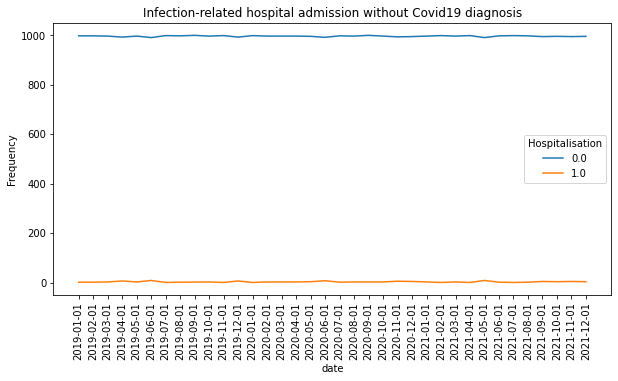

In [149]:
fig, ax1 = pyplot.subplots(figsize=(10, 5))
create_lineplot('delta_primary_care_covid_admitted_binary', 'Infection-related hospital admission without Covid19 diagnosis', 'Hospitalisation', ax1)
#plt.legend(title="Legend Title")
# plt.savefig(r'../output/hospitalisation_risk/Infection-related hospitalisation, no covid.jpg')
plt.show()

In [151]:
# # select patients whom their delta date is between 90 and -30
# data_hosp = data[~data['delta_primary_care_covid_admitted'].isnull()]
# data_hosp.head()

### 2- Negative binomial regression

For negative binomial regression (NB2), a 5-step method is proposed in https://timeseriesreasoning.com/contents/negative-binomial-regression-model/. These steps are:
<ol>
  <li>Poisson regression to obtain the vector of fitted rates of lambda.</li>
  <li>Auxiliary OLS (ordinary least squares) regression to obtain the value of alpha.</li>
  <li>Fit NB2 regression model to the data with the obtained alpha.</li>
  <li>Fit NB2 model to the test data set and test the goodness of the model.</li>
</ol>

In [175]:
from patsy import dmatrices
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [292]:
data.admitted.value_counts()

0    3600
1     400
Name: admitted, dtype: int64

#### 2-1- Poisson regression for lambda calculation

In [152]:
# # define a column of month and day
# data_hosp['admitted_month'] = data_hosp.admitted_date.dt.month
# data_hosp['admitted_day'] = data_hosp.admitted_date.dt.day

In [153]:
# # split data into 80% training and 20% testing
# mask = np.random.rand(len(data_hosp)) < 0.8
# data_hosp_train = data_hosp[mask]
# data_hosp_test = data_hosp[~mask]
# print(f'data train: {data_hosp_train.shape}')
# print(f'data test: {data_hosp_test.shape}')

In [154]:
# # set up a regression expression
# expr_data_hosp = """admitted ~ admitted_month + admitted_day + age + sex + imd"""
# #expr_data_hosp = """admitted ~ admitted_date + age + sex + imd"""

In [155]:
# # set up the training and testing of the poisson regression
# y_train, X_train = dmatrices(expr_data_hosp, data_hosp_train, return_type='dataframe', NA_action='drop')
# y_test, X_test = dmatrices(expr_data_hosp, data_hosp_test, return_type='dataframe', NA_action='drop')

In [156]:
# print(f'y_train: {y_train.shape}')
# print(f'X_train: {X_train.shape}')
# print(f'y_test: {y_test.shape}')
# print(f'X_test: {X_test.shape}')

In [157]:
# X_train.head()

In [158]:
# X_test.head()

In [300]:
# from sklearn.model_selection import train_test_split
# X = data_hosp[['admitted_month', 'admitted_day', 'age', 'sex', 'imd']]
# y = data_hosp['admitted']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) 

In [255]:
# print(f'y_train: {y_train.shape}')
# print(f'X_train: {X_train.shape}')
# print(f'y_test: {y_test.shape}')
# print(f'X_test: {X_test.shape}')

In [159]:
# # use generalised linear models (GLM) class of statsmodels package to train the poisson regression model
# poisson_training_results = sm.GLM(y_train, X_train, family=sm.families.Poisson()).fit()

In [160]:
# print(poisson_training_results.summary())

In [161]:
# # print the vectore of fitted rates of lambda produced by the training
# print(poisson_training_results.mu)

In [162]:
# # compuet the length of mu
# print(len(poisson_training_results.mu))

#### 2-2- Auxiliary OLS (ordinary least squares) regression

In [163]:
# # define a variables called lambda with values from the poisson regression
# data_hosp_train['lambda'] = poisson_training_results.mu

In [164]:
# # calculate the values of the dependant variable of ols regression
# data_hosp_train['AUX_OLS_DEP'] = data_hosp_train.apply(lambda x: ((x['admitted'] - x['lambda'])**2 - x['lambda']) / x['lambda'], axis=1)

In [165]:
# # # calculate ols regression with a regression expression defined in the formula parameter
# aux_olsr_results = smf.ols(formula = "Q('AUX_OLS_DEP') ~ Q('lambda') - 1", data = data_hosp_train).fit()

In [166]:
# print(aux_olsr_results.params)

In [167]:
# aux_olsr_results.tvalues

#### 2-3- Negative binomial

In [168]:
# alpha=aux_olsr_results.params[0]
# alpha=abs(alpha)
# print(f'alpha= {alpha:.4f}')

In [169]:
# # training NB2 regression model with the training data
# # parameter alpha cannot be a negative value; so I used its absolute value. 
# # see: https://www.statsmodels.org/dev/generated/statsmodels.genmod.families.family.NegativeBinomial.html
# nb2_training_results = sm.GLM(y_train, X_train,family=sm.families.NegativeBinomial(alpha=alpha)).fit()

In [170]:
# nb2_training_results.summary()

#### 2-4- Fitting NB2 model to testing data

In [171]:
# nb2_predictions = nb2_training_results.get_prediction(X_test)

In [172]:
# nb2predictions_summary_frame = nb2_predictions.summary_frame()
# print(nb2predictions_summary_frame)

In [173]:
# # add admitted date from data_hosp dataframe by lookup; then sorted with admitted dates
# X_test['admitted_date'] = data_hosp.admitted_date.loc[X_test.index]
# X_test = X_test.sort_values(by=['admitted_date'])

In [174]:
# NB_predicted_counts=nb2predictions_summary_frame['mean']
# actual_counts = y_test['admitted']
# fig = plt.figure(figsize=(12, 5))
# fig.suptitle('Actual values versus predicted values with negative binomial regression', fontsize=16)
# predicted, = plt.plot(X_test.admitted_date, NB_predicted_counts, 'go--', label='Predicted counts',)
# actual, = plt.plot(X_test.admitted_date, actual_counts, 'ro-', label='Actual counts')
# #plt.ylim(-0.1,1.1)
# plt.legend(handles=[predicted, actual])
# plt.xticks(rotation=25, ha='right')
# plt.grid()
# plt.tight_layout()
# plt.savefig('../output/hospitalisation_risk/actual_predicted_NB2.jpg')
# plt.show()

### 2- Negative binomial regression 

In [288]:
# define dictionaries

dict_sex = {'Female': 1, 'Male': 2}
dict_ethnicity = {'White': 1, 'Mixed': 2, 'Asian': 3, 'Black': 4, 'Other': 5, 'Unknown': 0}
dict_smoking = {'Ex-smoker': 1, 'Unknown': 2, 'Smoker': 3, 'Never smoked': 4, np.nan: 2}
dict_imd = {'Unknown': 0, '1 (most deprived)': 1, '2': 2, '3': 3, '4': 4, '5 (least deprived)': 5}
dict_flu = {'No': 0, 'Yes': 1}
#dic_delta_primary_care_covid_admitted_abs = {'No': 0, 'Yes': 1}

# reoplace values of dictionaries with existing ones

data = data.replace({"sex": dict_sex})
data = data.replace({"ethnicity": dict_ethnicity})
data = data.replace({"smoking_status": dict_smoking})
data = data.replace({"imd": dict_imd})
data = data.replace({"flu_vaccine": dict_flu})

In [289]:
# assigning 0 to NaN celss of delta_primary_care_covid_admitted_abs for compatibility of NB model
data['delta_primary_care_covid_admitted_abs'] = data['delta_primary_care_covid_admitted_abs'].fillna(0)
data['delta_primary_care_covid_admitted_abs'].value_counts()

0.0     35879
22.0        5
19.0        4
2.0         4
5.0         4
        ...  
84.0        1
73.0        1
90.0        1
65.0        1
66.0        1
Name: delta_primary_care_covid_admitted_abs, Length: 70, dtype: int64

In [301]:
data_NB = data.groupby(['date']).mean()#.reset_index()
data_NB.head()

,covrx1_dat,covrx2_dat,age,sex,practice,imd,bmi,ethnicity,smoking_status,gp_count,...,mod_severe_liver_comor,mod_severe_renal_comor,mi_comor,peptic_ulcer_comor,peripheral_vascular_comor,patient_id,CCI,delta_primary_care_covid_admitted,delta_primary_care_covid_admitted_abs,delta_primary_care_covid_admitted_binary
date,,,,,,,,,,,,,,,,,,,,,
2019-01-01,NaN,NaN,40.028,1.497,24.517,2.849,35.185744,1.210,2.099,3.442771,...,0.1,0.1,0.1,0.1,0.1,4973.108,4.370,26.500000,0.053,0.002
2019-02-01,NaN,NaN,39.605,1.512,24.717,2.734,34.854562,1.194,2.094,3.374622,...,0.1,0.1,0.1,0.1,0.1,4950.252,4.388,-21.000000,0.042,0.002
2019-03-01,NaN,NaN,39.398,1.492,24.302,2.828,34.864014,1.216,2.098,3.370968,...,0.1,0.1,0.1,0.1,0.1,4899.785,4.348,40.333333,0.155,0.003
2019-04-01,NaN,NaN,39.964,1.490,24.365,2.873,34.973314,1.242,2.074,3.312877,...,0.1,0.1,0.1,0.1,0.1,5088.359,4.401,34.000000,0.238,0.007
2019-05-01,NaN,NaN,41.170,1.484,24.137,2.818,35.069091,1.186,2.088,3.306533,...,0.1,0.1,0.1,0.1,0.1,5059.986,4.432,29.000000,0.105,0.003


In [302]:
X = data_NB[['age', 
          'sex', 
          'ethnicity', 
          'smoking_status', 
          'imd',
          'flu_vaccine',
          'delta_primary_care_covid_admitted_abs',
          ]]
y = data_NB['delta_primary_care_covid_admitted_binary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) 

In [303]:
print(f'y_train: {y_train.shape}')
print(f'X_train: {X_train.shape}')
print(f'y_test: {y_test.shape}')
print(f'X_test: {X_test.shape}')

y_train: (28,)
X_train: (28, 7)
y_test: (8,)
X_test: (8, 7)


In [306]:
nb2_training_results = sm.GLM(y_train, 
                              X_train,
                              family=sm.families.NegativeBinomial(alpha=1)).fit()

In [307]:
nb2_training_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            Generalized Linear Model Regression Results                             
====================================================================================================
Dep. Variable:     delta_primary_care_covid_admitted_binary   No. Observations:                   28
Model:                                                  GLM   Df Residuals:                       21
Model Family:                              NegativeBinomial   Df Model:                            6
Link Function:                                          Log   Scale:                          1.0000
Method:                                                IRLS   Log-Likelihood:               -0.63257
Date:                                      Mon, 06 Dec 2021   Deviance:                     0.013616
Time:                                              18:12:24   Pearson chi2:                   0.0117
No. Iterations:                                           4   Pseudo R-squ. (CS):           0.001412
Covariance Type:                                  nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
age                                      -0.0075      5.337     -0.001      0.999     -10.468      10.454
sex                                       7.0577    219.346      0.032      0.974    -422.853     436.968
ethnicity                                -5.3400    146.871     -0.036      0.971    -293.203     282.523
smoking_status                           -9.1728    552.342     -0.017      0.987   -1091.742    1073.397
imd                                       0.2180     78.685      0.003      0.998    -154.002     154.438
flu_vaccine                              80.3704   1.15e+04      0.007      0.994   -2.24e+04    2.26e+04
delta_primary_care_covid_admitted_abs     7.0889     55.905      0.127      0.899    -102.482     116.660
=========================================================================================================
"""

In [308]:
nb2_predictions = nb2_training_results.get_prediction(X_test)

In [309]:
nb2predictions_summary_frame = nb2_predictions.summary_frame()
print(nb2predictions_summary_frame)

                mean   mean_se  mean_ci_lower  mean_ci_upper
date                                                        
2019-05-01  0.002674  0.019754   1.376946e-09   5.192905e+03
2019-10-01  0.005275  0.065716   1.313231e-13   2.118994e+08
2020-01-01  0.001524  0.021555   1.386080e-15   1.675064e+09
2020-03-01  0.002030  0.013404   4.874669e-09   8.456020e+02
2020-05-01  0.004112  0.057992   4.060995e-15   4.163100e+09
2020-10-01  0.002823  0.023059   3.141014e-10   2.536657e+04
2021-07-01  0.001380  0.013478   6.728565e-12   2.831124e+05
2021-09-01  0.003351  0.023627   3.342587e-09   3.359886e+03


In [310]:
X_test = X_test.apply(lambda x: x.sort_values(ascending=False))
X_test

,age,sex,ethnicity,smoking_status,imd,flu_vaccine,delta_primary_care_covid_admitted_abs
date,,,,,,,
2019-05-01,41.170,1.484,1.186,2.088,2.818,0.1,0.105
2019-10-01,39.889,1.525,1.164,2.091,2.785,0.1,0.147
2020-01-01,41.918,1.494,1.212,2.077,2.813,0.1,0.022
2020-03-01,40.009,1.486,1.184,2.089,2.809,0.1,0.063
2020-05-01,38.260,1.480,1.220,2.092,2.766,0.1,0.199
2020-10-01,39.324,1.473,1.194,2.084,2.834,0.1,0.122
2021-07-01,39.581,1.485,1.212,2.084,2.800,0.1,0.024
2021-09-01,39.742,1.484,1.178,2.093,2.811,0.1,0.136


In [311]:
# add admitted date from data_hosp dataframe by lookup; then sorted with admitted dates
X_test['delta_primary_care_covid_admitted_abs'] = data_NB['delta_primary_care_covid_admitted_abs'].loc[X_test.index]
#X_test = X_test.sort_values(by=['delta_primary_care_covid_admitted_abs'])

In [313]:
X_test

,age,sex,ethnicity,smoking_status,imd,flu_vaccine,delta_primary_care_covid_admitted_abs
date,,,,,,,
2019-05-01,41.170,1.484,1.186,2.088,2.818,0.1,0.105
2019-10-01,39.889,1.525,1.164,2.091,2.785,0.1,0.147
2020-01-01,41.918,1.494,1.212,2.077,2.813,0.1,0.022
2020-03-01,40.009,1.486,1.184,2.089,2.809,0.1,0.063
2020-05-01,38.260,1.480,1.220,2.092,2.766,0.1,0.199
2020-10-01,39.324,1.473,1.194,2.084,2.834,0.1,0.122
2021-07-01,39.581,1.485,1.212,2.084,2.800,0.1,0.024
2021-09-01,39.742,1.484,1.178,2.093,2.811,0.1,0.136


In [312]:
y_test

date
2021-09-01    0.005
2019-10-01    0.003
2020-05-01    0.004
2020-01-01    0.001
2021-07-01    0.001
2019-05-01    0.003
2020-03-01    0.003
2020-10-01    0.003
Name: delta_primary_care_covid_admitted_binary, dtype: float64

In [314]:
NB_predicted_counts=nb2predictions_summary_frame['mean']
NB_predicted_counts

date
2019-05-01    0.002674
2019-10-01    0.005275
2020-01-01    0.001524
2020-03-01    0.002030
2020-05-01    0.004112
2020-10-01    0.002823
2021-07-01    0.001380
2021-09-01    0.003351
Name: mean, dtype: float64

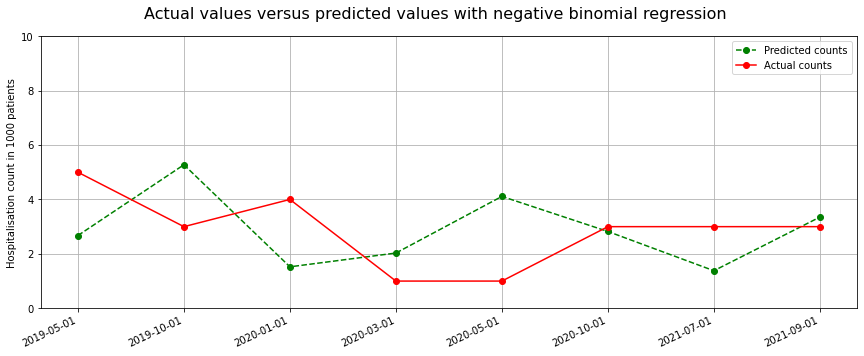

In [323]:
NB_predicted_counts=nb2predictions_summary_frame['mean']*1000
actual_counts = y_test*1000
fig = plt.figure(figsize=(12, 5))
fig.suptitle('Actual values versus predicted values with negative binomial regression', fontsize=16)
predicted, = plt.plot(X_test.index, NB_predicted_counts, 'go--', label='Predicted counts',)
actual, = plt.plot(X_test.index, actual_counts, 'ro-', label='Actual counts')
#plt.ylim(-0.1,1.1)
plt.legend(handles=[predicted, actual])
plt.xticks(rotation=25, ha='right')
plt.grid()
plt.tight_layout()
plt.ylabel('Hospitalisation count in 1000 patients')
plt.ylim(0,10)
#plt.savefig('../output/hospitalisation_risk/actual_predicted_NB2.jpg')
plt.show()

In [ ]:
#data['CCII'] = np.nan
#col0 = data.columns.get_loc('CCII')

# chalrson_point_1 = [data.columns.get_loc('mi_comor'), 
#                     data.columns.get_loc('cardiovascular_comor'),
#                     data.columns.get_loc('peripheral_vascular_comor'),
#                     data.columns.get_loc('chronic_obstructive_pulmonary_comor'),
#                     data.columns.get_loc('diabetes_comor'),
#                     data.columns.get_loc('dementia_comor'),
#                     data.columns.get_loc('peptic_ulcer_comor'),
#                     data.columns.get_loc('connective_tissue_comor'),
#                     data.columns.get_loc('mild_liver_comor')]

# chalrson_point_2 = [data.columns.get_loc('hemiplegia_comor'),
#                     data.columns.get_loc('mod_severe_renal_comor'),
#                     data.columns.get_loc('diabetes_complications_comor'),
#                     data.columns.get_loc('cancer_comor')]

# chalrson_point_3 = [data.columns.get_loc('mod_severe_liver_comor')]

# chalrson_point_4 = [data.columns.get_loc('metastatic_cancer_comor'),
#                     data.columns.get_loc('hiv_comor')]

In [ ]:
# for idx, x in enumerate(data['CCI']):
#     n=0
#     for y in chalrson_point_1:
#         if data.iat[idx, y] == 1:
#             n=n+1
#         data.iat[idx, col0]=n
#     for y in chalrson_point_2:
#         if data.iat[idx, y] == 1:
#             n=n+2
#         data.iat[idx, col0]=n
#     for y in chalrson_point_3:
#         if data.iat[idx, y] == 1:
#             n=n+3
#         data.iat[idx, col0]=n
#     for y in chalrson_point_4:
#         if data.iat[idx, y] == 1:
#             n=n+6
#         data.iat[idx, col0]=n

In [ ]:
#data.CCI.value_counts()

In [61]:
#ax = data['practice'].value_counts(np.nan).sort_index().plot(kind='bar', figsize=(10, 5), rot=0, color = 'blue', alpha=0.5)
#plt.xlabel('Practice')
#plt.ylabel('Percentage')
#plt.title('Percentage of practices')
#plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
##plt.xlim(0, 100)
##plt.ylim(0, 1)
#plt.grid()
#plt.savefig(r'../output/hospitalisation_risk/practices.png', edgecolor='none')
#plt.show()

In [62]:
#sns.distplot(data['age'], hist=True, kde=True, 
#             bins=15, color = 'blue', 
#             #hist_kws={'edgecolor':'black'},
#             kde_kws={'linewidth': 2})

#plt.xlabel('Age')
##plt.ylabel('Frequency')
#plt.title('Histogram of age')
#plt.xlim(-10, 100)
##plt.ylim(0, 1100)
#plt.grid(True)
##plt.savefig(r'../output/hospitalisation_risk/antibacterial_prescirption.png', edgecolor='none')
#plt.show()

In [63]:
##data['age_cat'].value_counts().sort_index()

#data['age_cat'].value_counts(np.nan).sort_index().plot(kind='bar', figsize=(10, 5), rot=0, color = 'blue', alpha=0.5)
#plt.xlabel('Age category')
#plt.ylabel('Percentage')
#plt.title('Percentage of age categories')
##plt.xlim(0, 100)
#plt.ylim(0, 0.15)
#plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
#plt.grid()
#print(data['age_cat'].value_counts().sort_index())
#plt.savefig(r'../output/hospitalisation_risk/age_categories.png', edgecolor='none')
#plt.show()

In [64]:
#for i, binwidth in enumerate([1, 5, 10, 15]):
    
#    # Set up the plot
#    ax = plt.subplot(2, 2, i + 1)
#    
#    # Draw the plot
#    ax.hist(data['bmi'], bins = int(180/binwidth), 
#             color = 'blue', edgecolor = 'black')
    
#    # Title and labels
#    ax.set_title('Histogram with Binwidth = %d' % binwidth, size = 10)
#    ax.set_xlabel('Delay (min)', size = 12)
#    ax.set_ylabel('Flights', size= 12)

#plt.tight_layout()
#plt.show()

In [65]:
#fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4)
#fig.suptitle('Vertically stacked subplots')

#ax1.hist(data['bmi'], bins = int(180/1), color = 'blue', edgecolor = 'black')
#ax2.hist(data['bmi'], bins = int(180/5), color = 'blue', edgecolor = 'black')
#ax3.hist(data['bmi'], bins = int(180/10), color = 'blue', edgecolor = 'black')
#ax4.hist(data['bmi'], bins = int(180/15), color = 'blue', edgecolor = 'black')

#plt.tight_layout()
#plt.show()

In [66]:
#fig, axs = plt.subplots(2, 2, 
#                        #figsize=(18, 14)
#                        )

#axs[0, 0].hist(data['bmi'], bins = int(180/1), color = 'blue', edgecolor = 'black')
#axs[0, 1].hist(data['bmi'], bins = int(180/5), color = 'blue', edgecolor = 'black')
#axs[1, 0].hist(data['bmi'], bins = int(180/10), color = 'blue', edgecolor = 'black')
#axs[1, 1].hist(data['bmi'], bins = int(180/15), color = 'blue', edgecolor = 'black')

#plt.tight_layout()
#plt.show()

In [67]:
#fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2)
#fig.suptitle('Vertically stacked subplots')

#ax1.hist(data['bmi'], bins = int(180/1), color = 'blue', edgecolor = 'black')
#ax2.hist(data['bmi'], bins = int(180/5), color = 'blue', edgecolor = 'black')
#ax3.hist(data['bmi'], bins = int(180/10), color = 'blue', edgecolor = 'black')
#ax4.hist(data['bmi'], bins = int(180/15), color = 'blue', edgecolor = 'black')

#for ax in fig.get_axes():
#    ax.label_outer()
#    ax.set(xlabel='x-label', ylabel='y-label')

#plt.tight_layout()
#plt.show()